# Perfume Recommender System

## Purpose:
The purpose of this project is two-fold,  

1. Taking the knowledge learned from the [Getting Started with a Movie Recommendation System](https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook) and using it as guided practice for the Parfumo dataset used for [Tidy Tuesday on 2024.12.10](https://github.com/rfordatascience/tidytuesday/blob/main/data/2024/2024-12-10/readme.md)
2. Practicing using text-based data and NLP-approaches for data analysis.

## Data and Package Import
Lets load the necessary packages and the dataset.

In [3]:
library(httr)
library(tidyverse)
library(jsonlite)
library(glue)
library(janitor)
library(naniar)
library(readr)
library(ggplot2)

In [1]:
parfumo_data_clean <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-10/parfumo_data_clean.csv')

Rows: 59325 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Number, Name, Brand, Concentration, Main_Accords, Top_Notes, Middl...
dbl  (3): Release_Year, Rating_Value, Rating_Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


This data contains the follow features:

|variable      |class       |description                                                                      |
|:-------------|:-----------|:--------------------------------------------------------------------------------|
|Number        |character   |A unique identifier or number assigned to each perfume.                          |
|Name          |character   |The name of the perfume or fragrance.                                            |
|Brand         |character   |The brand or manufacturer of the fragrance.                                      |
|Release_Year  |double      |The year the fragrance was released.                                             |
|Concentration |character   |The concentration of the fragrance (e.g., Eau de Parfum, Eau de Toilette).       |
|Rating_Value  |double      |The overall rating score given by users.                                         |
|Rating_Count  |double      |The number of user ratings for the fragrance.                                    |
|Main_Accords  |character   |The primary scent characteristics or accords of the fragrance.                   |
|Top_Notes     |character   |The initial scent notes perceived after application.                             |
|Middle_Notes  |character   |The heart or middle notes of the fragrance that emerge after the top notes fade. |
|Base_Notes    |character   |The lasting, final scent notes that linger after the fragrance has dried down.   |
|Perfumers     |character   |The creators or perfumers responsible for the fragrance composition.             |
|URL           |character   |The link to the product page on Parfumo.com.                                     |

Lets take a glimpse at the dataset.

In [5]:
glimpse(parfumo_data_clean)

Rows: 59,325
Columns: 13
$ Number        <chr> "455", "0071", "0154", "0162", "0171", "0191", "02", "03…
$ Name          <chr> "Tabac Écarlate", "Tidal Pool", "Pumpkin Pie", "Wet Ston…
$ Brand         <chr> "Le Ré Noir", "CB I Hate Perfume", "CB I Hate Perfume", …
$ Release_Year  <dbl> NA, 2004, 1998, 2006, NA, 1975, NA, NA, NA, NA, NA, NA, …
$ Concentration <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Rating_Value  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 7.8,…
$ Rating_Count  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 2, 2…
$ Main_Accords  <chr> NA, NA, "Green, Leathery, Chypre, Animal", NA, NA, NA, N…
$ Top_Notes     <chr> NA, "Bergamot", NA, NA, NA, NA, "Coconut", "Basil, Berga…
$ Middle_Notes  <chr> NA, "French lavender", NA, NA, NA, NA, "Milk, Tonka bean…
$ Base_Notes    <chr> NA, "Musk, Foulness", NA, NA, NA, NA, "Amber, Musk, Vani…
$ Perfumers     <chr> "Valery Sokolov / Валерий Соколов", "Harry Frémont", NA,…
$ URL          

## Demographic Filtering
Demographic filtering is a generalized approach to recommendations. Instead of focusing on subsets of customers, the goal is to identify perfumes that appeal to the average customer. The reasoning behind this approach is that scents that are highly rated have a higher chance of being liked by the masses.
Before starting we need three things:
- a metric to score each perfume
- calculate the score for each perfume
- sort the perfumes by score and recommdn the best rated perfume to the users.

Warning message:
Removed 29279 rows containing missing values or values outside the scale range
(`geom_point()`). 


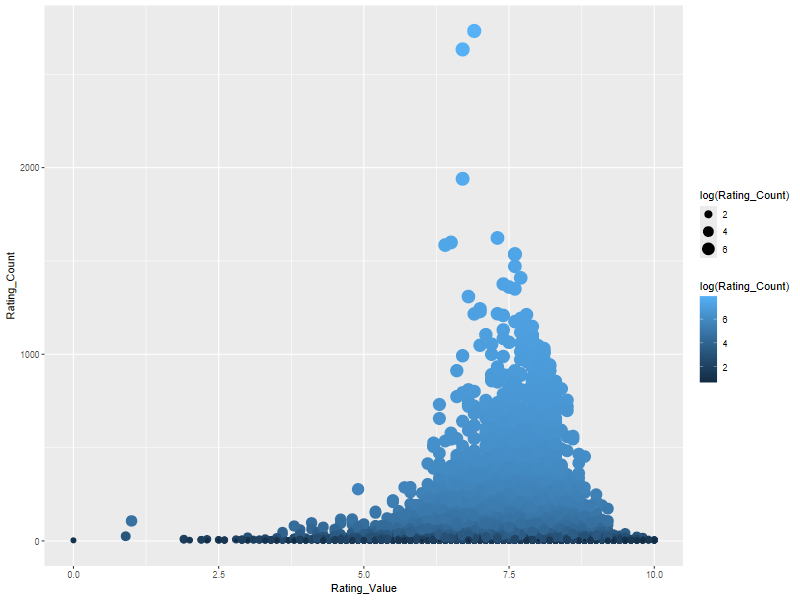

In [27]:
library("RColorBrewer")
parfumo_rating_vs_counts <- parfumo_data_clean %>%
    ggplot(aes(x=Rating_Value,y=Rating_Count)) +
    geom_point(aes(size = Rating_Count, color = log(Rating_Count))) 

parfumo_rating_vs_counts + scale_fill_brewer(palette="Dark2")